# Finding a Better Place in Jabalpur

## Business Proposal | Introduction
### Introduction:
The purpose of this Project is to help people in exploring better facilities around their neighborhood. It will help people making smart and efficient decision on selecting great neighborhood out of numbers of other neighborhoods in Jabalpur, India.

Lots of people are migrating to various Urban Cities like Jabalpur  and need lots of research for good housing prices and reputated schools for their children. This project is for those people who are looking for better neighborhoods. For ease of access to Cafe, School, Super market, medical shops, grocery shops, mall, theatre, hospital, like minded people, etc.

This Project aims to create an analysis of features for people coming to Jabalpur to search for the best neighborhood as a comparative analysis between different neighborhoods. The features include average housing prices and better schools according to ratings, crime rates of that particular area, road connectivity, weather conditions, good management for emergency, water resources both freash and waste water and excrement conveyed in sewers and recreational facilities.

It will help people to get awareness of the area and neighborhood before moving to a new city, state, country or place for their work or to start a new fresh life.

### Problem Which Tried to Solve:

The major purpose of this project, is to suggest a better neighborhood in a new city for the person who are shiffting there. Social presence in society in terms of like minded people. Connectivity to the airport, bus stand, city center, markets and other daily needs things nearby.

1.Sorted list of house in terms of housing prices in a ascending or descending order <br /> 
2.Sorted list of schools in terms of location, fees, rating and reviews

### The Location:
jabalpur is a popular destination in India ,Madhya Pradesh to reside. As a result, it is one of the most diverse and multicultural areas in India, being home to various religious groups and places of worship.

### Foursquare API:
This project would use Four-square API as its prime data gathering source as it has a database of millions of places, especially their places API which provides the ability to perform location search, location sharing and details about a business.

### Work Flow:
Using credentials of Foursquare API features of near-by places of the neighborhoods would be mined. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 500.

### Clustering Approach:
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.
To compare the similarities of two cities, we decided to explore neighborhoods, segment them, and group them into clusters to find similar neighborhoods in a big city like Bhopaland Jabalpur. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: k-means clustering algorithm

### Libraries Which are Used to Develope the Project:
Pandas: For creating and manipulating dataframes.

Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map.

Scikit Learn: For importing k-means clustering.

JSON: Library to handle JSON files.

XML: To separate data from presentation and XML stores data in plain text format.

Geocoder: To retrieve Location Data.

Beautiful Soup and Requests: To scrap and library to handle http requests.

Matplotlib: Python Plotting Module.

## Data Description:
Data Link: https://www.mapsofindia.com/pincode/india/madhya-pradesh/jabalpur/

Will use Scarborough dataset which we scrapped from wikipedia on Week 3. Dataset consisting of latitude and longitude, zip codes.

### Foursquare API Data:
We will need data about different venues in different neighborhoods of that specific Jabalpur. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of neighborhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighborhood. For each neighborhood, we have chosen the radius to be 100 meter.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

Neighborhood
Neighborhood Latitude
Neighborhood Longitude
Venue
Name of the venue e.g. the name of a store or restaurant
Venue Latitude
Venue Longitude
Venue Category


In [1]:
!pip install geopy
!pip install folium
print("Installed!")

Installed!


In [2]:
import folium
import requests
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd 
import numpy as np
import geocoder
import xml
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
print('Imported')

Imported


### Web scraping to find the Neighborhood

In [17]:
url="https://www.mapsofindia.com/pincode/india/madhya-pradesh/jabalpur/"
extract_data=requests.get(url).text
jabalpur_data=BeautifulSoup(extract_data,'html.parser')

In [18]:
jabalpur_data

<!DOCTYPE html>

<html lang="en">
<head>
<title>Pin Code of Jabalpur in Madhya Pradesh, Jabalpur Postal Code   </title>
<meta content="Get Pin Code (Zip Code) of Jabalpur, district of Madhya Pradesh. Find out Pin Code or postal code list of all Pin Code zones of Jabalpur district." name="description"/>
<meta content="Pin Code of Jabalpur, Pin Code of Jabalpur, postal code of Jabalpur, zip code of Jabalpur, Jabalpur pincode, Jabalpur postal code, Jabalpur zipcode." name="keywords"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<link href="https://m.mapsofindia.com/pincode/madhya-pradesh/jabalpur/" media="only screen and (max-width:736px)" rel="alternate"/>
<link href="https://m.mapsofindia.com/pincode/amp/madhya-pradesh/jabalpur/" rel="amphtml"/>
<script async="" src="https://www.mapsofindia.com/elements/style.js"></script>
<script async="" language="JavaScript" src="https:

In [19]:
column_names=['PostalCode','Neighborhood','Jabalpur']
jabalpur_1=pd.DataFrame(columns=column_names)

content=jabalpur_data.find('div',class_='dividesection2')
table = content.table.tbody
postcode=0
jabalpur=0
neighborhood=0

for tr in content.find_all('tr'):
    i=0
    for td in tr.find_all('td'):
        if i==0:
            neighborhood=td.text
            i=i+1
        elif i== 1:
            postcode=td.text
            i=i+1
        elif i== 2:
            jabalpur= td.text
        
    jabalpur_1=jabalpur_1.append({'PostalCode': postcode,'Neighborhood':neighborhood,'Jabalpur':jabalpur,},ignore_index=True)



In [20]:
jabalpur_1=jabalpur_1[jabalpur_1!=0]
jabalpur_1=jabalpur_1[jabalpur_1!=['Pincode','Location','District']]
jabalpur_1.reset_index(drop=True,inplace=True)

In [21]:
jabalpur_1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,PostalCode,Neighborhood,Jabalpur
2,482004,Adhartal,Jabalpur
3,482001,Agasaud,Jabalpur
4,482003,Amahinota,Jabalpur
5,482004,Amkhera,Jabalpur
6,482004,Anand Nagar,Jabalpur
7,482004,Anandnagar,Jabalpur
8,482001,Archha,Jabalpur
9,483113,Badhaiyakheda,Jabalpur
10,483220,Badkheda,Jabalpur
11,483110,Badkhera,Jabalpur


In [22]:
jabalpur_1=jabalpur_1.dropna()
jabalpur_1.reset_index(drop=True,inplace=True)

In [23]:
jabalpur_1.describe()

,PostalCode,Neighborhood,Jabalpur
count,188,188,188
unique,25,188,1
top,482001,Jonesganj,Jabalpur
freq,40,1,188


In [24]:
jabalpur_1.shape

(188, 3)

In [25]:
jabalpur_1.head()

,PostalCode,Neighborhood,Jabalpur
0,482004,Adhartal,Jabalpur
1,482001,Agasaud,Jabalpur
2,482003,Amahinota,Jabalpur
3,482004,Amkhera,Jabalpur
4,482004,Anand Nagar,Jabalpur


In [26]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Jabalpur, India'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('482002')

[23.244950000000074, 79.89552284000007]

In [27]:
postal_codes = jabalpur_1['PostalCode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [28]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
jabalpur_1['Latitude'] = df_coords['Latitude']
jabalpur_1['Longitude'] = df_coords['Longitude']

In [30]:
jabalpur_1.head(10)

,PostalCode,Neighborhood,Jabalpur,Latitude,Longitude
0,482004,Adhartal,Jabalpur,23.219735,79.945806
1,482001,Agasaud,Jabalpur,23.149730,79.944821
2,482003,Amahinota,Jabalpur,23.049765,79.698945
3,482004,Amkhera,Jabalpur,23.219735,79.945806
4,482004,Anand Nagar,Jabalpur,23.219735,79.945806
5,482004,Anandnagar,Jabalpur,23.219735,79.945806
6,482001,Archha,Jabalpur,23.149730,79.944821
7,483113,Badhaiyakheda,Jabalpur,23.325300,79.736522
8,483220,Badkheda,Jabalpur,23.302435,80.070779
9,483110,Badkhera,Jabalpur,23.232220,80.371464


### Address 

In [31]:
address='Jabalpur,India'

locator=Nominatim(user_agent="MyGeoCode")
location=locator.geocode(address)
latitude_x=location.latitude
longitude_y=location.longitude
print("The Location of Jabalpur is Latitude:{},Longitude:{}".format(latitude_x,longitude_y))

The Location of Jabalpur is Latitude:23.1608938,Longitude:79.9497702


### Map of Jabalpur

In [36]:
jabalpur_map=folium.Map(location=[latitude_x,longitude_y],zoom_start=10)

for lat , lng ,nei in zip(jabalpur_1['Latitude'],jabalpur_1['Longitude'],jabalpur_1['Neighborhood']):
    
    label='{}'.format(nei)
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(jabalpur_map)

jabalpur_map
    

### Foursquare API

In [37]:
CLIENT_ID = '1S0MMTMSCVUKCSOP4CHU2WHTVE2USUGBZWNLGKPBBCHBJU4G' 
CLIENT_SECRET = '5GYIY5PV1JRGGQOXUNB3NS5N2LPG2UCSRMPJBARUS4XIIQRU' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1S0MMTMSCVUKCSOP4CHU2WHTVE2USUGBZWNLGKPBBCHBJU4G
CLIENT_SECRET: 5GYIY5PV1JRGGQOXUNB3NS5N2LPG2UCSRMPJBARUS4XIIQRU


In [38]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_x, 
   longitude_y, 
    radius, 
   LIMIT)
results = requests.get(url).json()


In [39]:
venues=results['response']['groups'][0]['items']
nearby_venues=json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups'],
      dtype='object')

In [40]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
    
    if len(categories_list)== 0:
        return None
    else:
        return categories_list[0]['name']

### Nearby Venues/Location

In [41]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Hotel Rishi Regency,"[{'id': '4bf58dd8d48988d1fb931735', 'name': 'M...",23.165003,79.951099
1,Jabalpur Rly Station,"[{'id': '4f4531504b9074f6e4fb0102', 'name': 'P...",23.165160,79.950586
2,Lovely Restraunt,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",23.165816,79.949493
3,Jabalpur Junction,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",23.165073,79.951170


### Categories of Nearby Venue /Location

In [42]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Hotel Rishi Regency,Motel,23.165003,79.951099
1,Jabalpur Rly Station,Platform,23.165160,79.950586
2,Lovely Restraunt,Fast Food Restaurant,23.165816,79.949493
3,Jabalpur Junction,Train Station,23.165073,79.951170


In [43]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Fast Food Restaurant    1
Motel                   1
Train Station           1
Platform                1
Name: categories, dtype: int64

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
jabalpur_venues = getNearbyVenues(names=jabalpur_1['Neighborhood'],
                                   latitudes=jabalpur_1['Latitude'],
                                   longitudes=jabalpur_1['Longitude']
                                  )

Adhartal
Agasaud
Amahinota
Amkhera
Anand Nagar
Anandnagar
Archha
Badhaiyakheda
Badkheda
Badkhera
Baghraji
Bai Ka bagicha
Bandhi
Barbati
Barela
Bargi
Bargi  ipc
Bargi Nagar
Baroda
Baroda Chhedi
Basendi
Belkhadu
Belkheda
Bhaironghat Pipariya
Bheeta
Bheraghat
Bhuwara
Bilhari
Boria
Chargawan
Chaurai Kala
Chhaparhat
Chhartarpur
Civil Lines
Dadargawan
Dehri Khurd
Deori Patpara
Dhanpuri
Dhanwahi
Dharampura
Dixitpura
Engineering College
Gadaghat
Gadar Pipariya
Gangai Badkheda
Gangai Bijori
Gangai Padaria
Ganjipura
Garha
Garha Bazar
Garha Phatak
Gauraiyaghat
Gauri
Ghat Piparia
Ghughara
Gohalpur
Gokulpur
Gubra Kala
Gun Shop
Gupteshwar
Gurandi Bazar
Gwarighat
H.R.lines
Hanumantal
Harduli
Harrai
Hathital
High Court
Hinotia Bhoi
Howbagh
I.T.i.
Imlai
Jabalpur
Jabalpur Cantt
Jabalpur City
Jabalpur Factory
Jeewan Bima nigam
Jhiria
Jhirmila
Jonesganj
Kailwas
Kaladehi
Kaladumar
Kamala Nehru nagar
Kanchanpur
Karmeta
Kastara
Kasturba Nagar
Katangi
Katra Belkheda
Khairi
Khajri
Khamaria
Khamaria Market
Kham

In [48]:
print('There are {} Uniques Categories.'.format(len(jabalpur_venues['Venue Category'].unique())))
jabalpur_venues.groupby('Neighborhood').count().head()

There are 10 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adhartal,1,1,1,1,1,1
Agasaud,4,4,4,4,4,4
Amkhera,1,1,1,1,1,1
Anand Nagar,1,1,1,1,1,1
Anandnagar,1,1,1,1,1,1


### One Hot Encoding of Features

In [51]:
jabalpur_onehot = pd.get_dummies(jabalpur_venues[['Venue Category']], prefix="", prefix_sep="")

jabalpur_onehot['Neighborhood'] = jabalpur_venues['Neighborhood'] 
fixed_columns = [jabalpur_onehot.columns[-1]] + list(jabalpur_onehot.columns[:-1])
jabalpur_onehot = jabalpur_onehot[fixed_columns]
jabalpur_grouped = jabalpur_onehot.groupby('Neighborhood').mean().reset_index()
jabalpur_onehot.head(5)

,Neighborhood,ATM,Asian Restaurant,Café,Clothing Store,Coffee Shop,Department Store,Dessert Shop,Hotel,Indian Restaurant,Jewelry Store
0,Adhartal,0,0,1,0,0,0,0,0,0,0
1,Agasaud,0,1,0,0,0,0,0,0,0,0
2,Agasaud,0,0,0,0,1,0,0,0,0,0
3,Agasaud,0,0,0,0,0,0,0,0,1,0
4,Agasaud,0,0,0,0,0,0,0,0,1,0


In [52]:
num_top_venues = 5
for hood in jabalpur_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =jabalpur_grouped[jabalpur_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adhartal ----
              venue  freq
0              Café   1.0
1               ATM   0.0
2  Asian Restaurant   0.0
3    Clothing Store   0.0
4       Coffee Shop   0.0


---- Agasaud ----
               venue  freq
0  Indian Restaurant  0.50
1   Asian Restaurant  0.25
2        Coffee Shop  0.25
3                ATM  0.00
4               Café  0.00


---- Amkhera ----
              venue  freq
0              Café   1.0
1               ATM   0.0
2  Asian Restaurant   0.0
3    Clothing Store   0.0
4       Coffee Shop   0.0


---- Anand Nagar ----
              venue  freq
0              Café   1.0
1               ATM   0.0
2  Asian Restaurant   0.0
3    Clothing Store   0.0
4       Coffee Shop   0.0


---- Anandnagar ----
              venue  freq
0              Café   1.0
1               ATM   0.0
2  Asian Restaurant   0.0
3    Clothing Store   0.0
4       Coffee Shop   0.0


---- Archha ----
               venue  freq
0  Indian Restaurant  0.50
1   Asian Restaurant  0.25
2       

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common Venues near Neighborhood

In [54]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jabalpur_grouped['Neighborhood']

for ind in np.arange(jabalpur_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jabalpur_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adhartal,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM
1,Agasaud,Indian Restaurant,Coffee Shop,Asian Restaurant,Jewelry Store,Hotel,Dessert Shop,Department Store,Clothing Store,Café,ATM
2,Amkhera,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM
3,Anand Nagar,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM
4,Anandnagar,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM


### K-Means Clustering

In [55]:
jabalpur_grouped_clustering = jabalpur_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(jabalpur_grouped_clustering)
kmeans.labels_

array([2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1])

In [60]:
jabalpur_merged =jabalpur_1.iloc[:16,:]

# merge jabalpur_grouped with jabalpur_data to add latitude/longitude for each neighborhood
jabalpur_merged = jabalpur_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

jabalpur_merged.head()

,PostalCode,Neighborhood,Jabalpur,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,482004,Adhartal,Jabalpur,23.219735,79.945806,2.0,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM
1,482001,Agasaud,Jabalpur,23.149730,79.944821,0.0,Indian Restaurant,Coffee Shop,Asian Restaurant,Jewelry Store,Hotel,Dessert Shop,Department Store,Clothing Store,Café,ATM
2,482003,Amahinota,Jabalpur,23.049765,79.698945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,482004,Amkhera,Jabalpur,23.219735,79.945806,2.0,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM
4,482004,Anand Nagar,Jabalpur,23.219735,79.945806,2.0,Café,Jewelry Store,Indian Restaurant,Hotel,Dessert Shop,Department Store,Coffee Shop,Clothing Store,Asian Restaurant,ATM


### Map of Cluster

In [61]:
kclusters = 10

In [64]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(jabalpur_merged['Latitude'], 
                                   jabalpur_merged['Longitude'], 
                                   jabalpur_merged['Neighborhood'], 
                                   jabalpur_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


TypeError: list indices must be integers or slices, not float

In [65]:
df1=jabalpur_merged.loc[jabalpur_merged['Cluster Labels'] == 0,jabalpur_merged.columns[[2] + list(range(5, jabalpur_merged.shape[1]))]]
df2=jabalpur_merged.loc[jabalpur_merged['Cluster Labels'] == 1,jabalpur_merged.columns[[2] + list(range(5, jabalpur_merged.shape[1]))]]
df3=jabalpur_merged.loc[jabalpur_merged['Cluster Labels'] == 2,jabalpur_merged.columns[[2] + list(range(5, jabalpur_merged.shape[1]))]]

In [75]:
jabalpur_Avg_HousingPrice=pd.DataFrame({"Neighborhood":jabalpur_1["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0,573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533800.0,279200.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,
                                                              ]})

In [76]:
jabalpur_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

<AxesSubplot:xlabel='Neighborhood'>

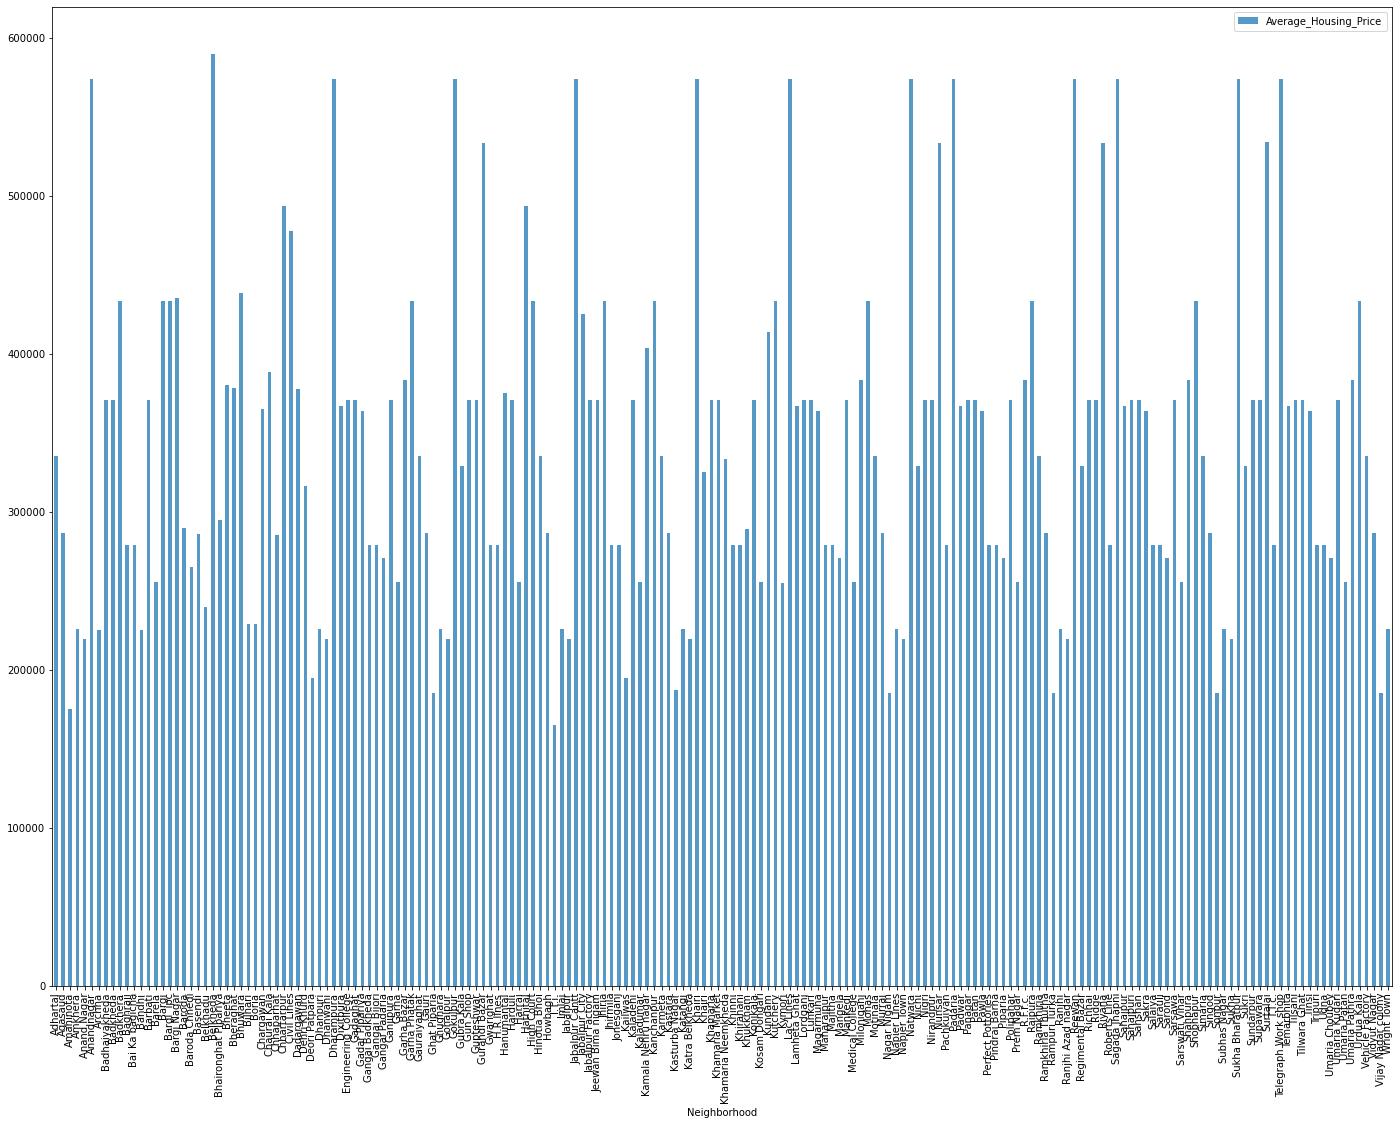

In [78]:
jabalpur_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

### School Rating By Cluster

In [85]:
new_jabalpur=jabalpur_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
jabalpur_school_ratings=pd.DataFrame({"Neighborhood":jabalpur_1["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7,
                                                           7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5
                                                           
                                                           ]})

In [86]:
jabalpur_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

<AxesSubplot:xlabel='Neighborhood'>

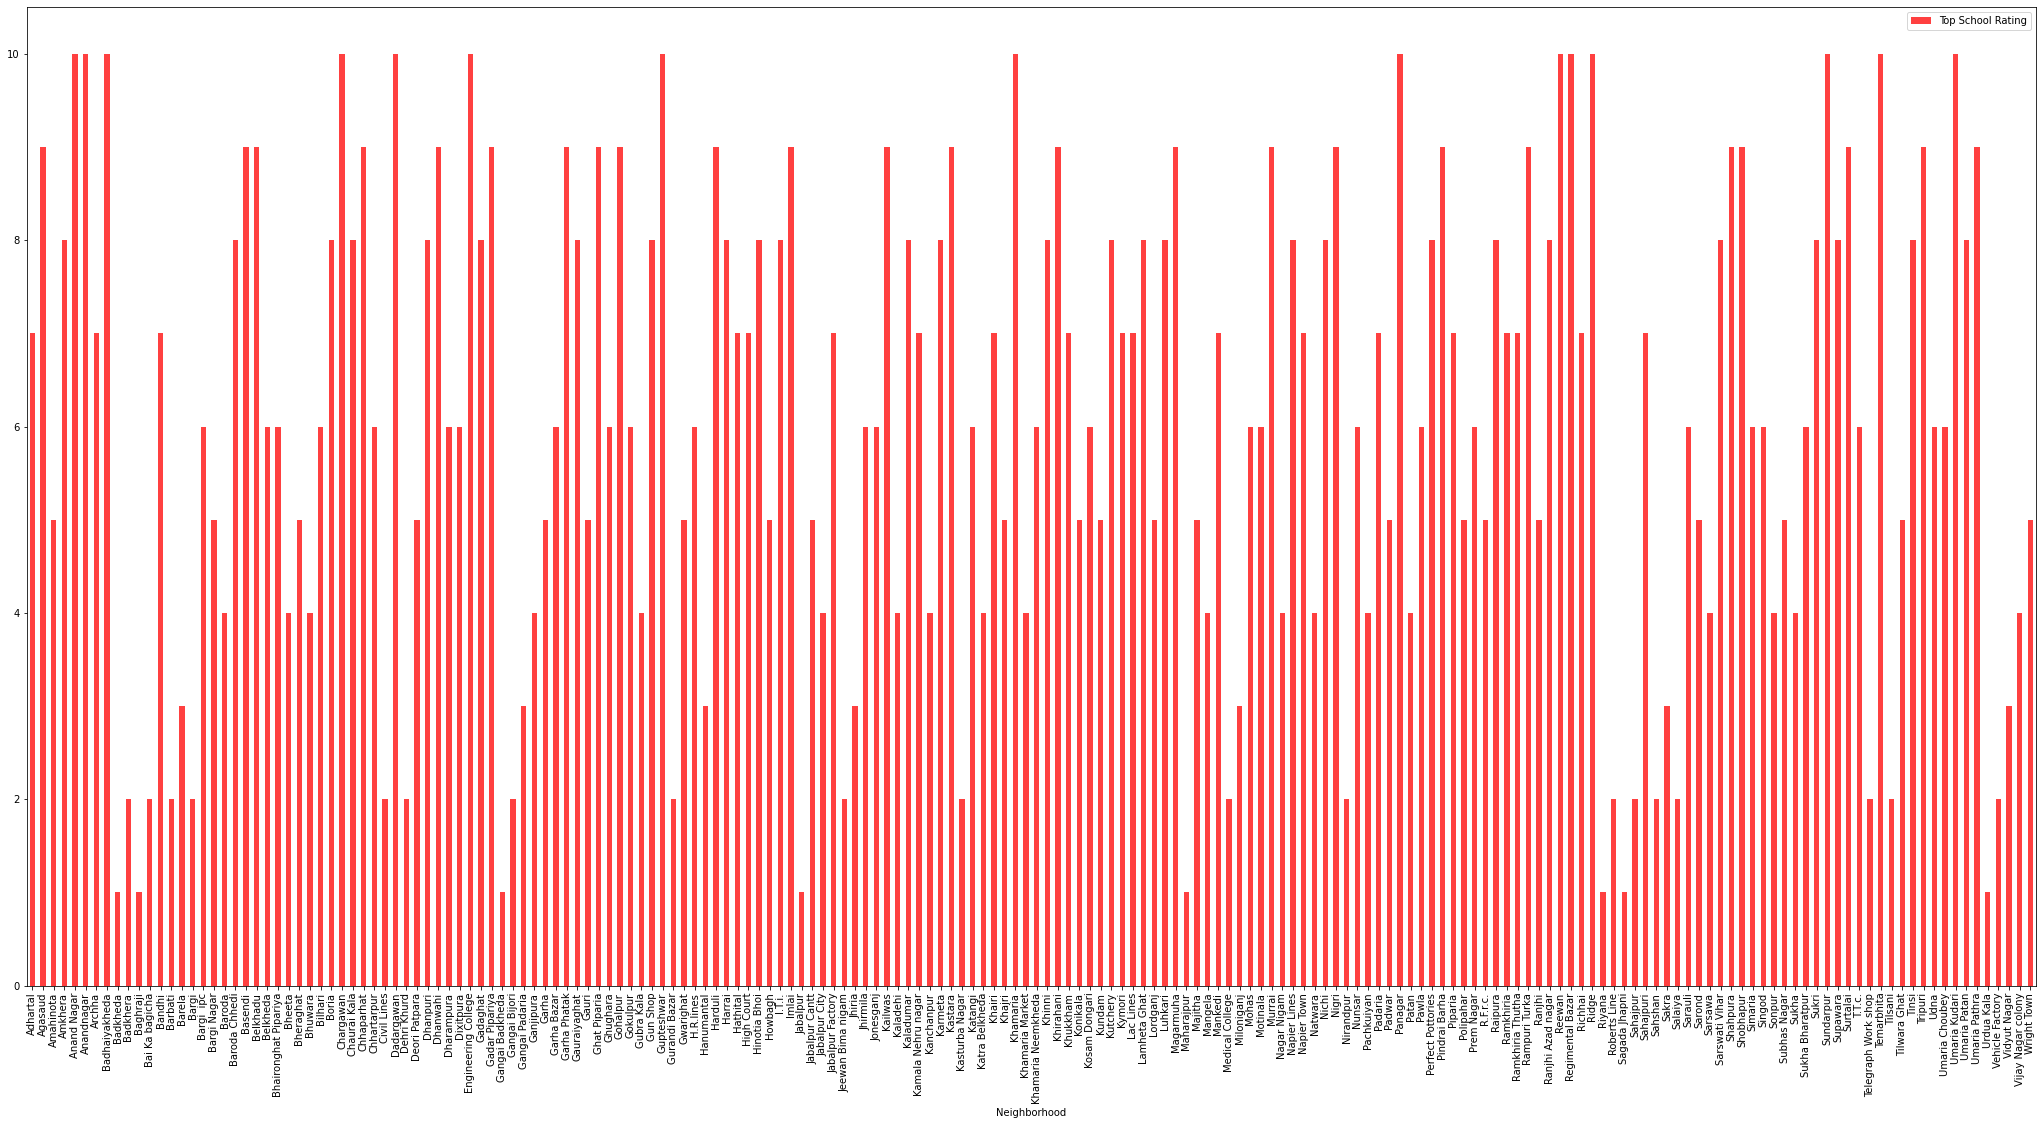

In [95]:
jabalpur_school_ratings.plot(kind='bar',figsize=(36,18),color='red',alpha=0.75)